In [602]:
library(tidyverse)
library(colorRamps)
library(wesanderson)
library(plotly)
library(stringr)
library(entropy)  
library(broom)
library(patchwork)
library(rnaturalearth)
library(sf)
library(dplyr)
options(repr.plot.width=12, repr.plot.heigh=12)

colormap

In [603]:

my_palette <- wes_palette("Zissou1", 12, type = "continuous")
# my_palette <- wes_palette("Darjeeling1", 12, type = "continuous")

# Set default color and fill scales globally
update_geom_defaults("bar", list(fill = my_palette[1], color= "white"))
update_geom_defaults("col", list(fill = my_palette[2], color="white"))
update_geom_defaults("line", list(color = my_palette[1], size = 1.2))

# Optional: Set default discrete scale globally (use in your plots)
scale_fill_discrete <- function(...) scale_fill_manual(values = my_palette, ...)
scale_color_discrete <- function(...) scale_color_manual(values = my_palette, ...)


dual_pal <- wes_palette("Zissou1", 2, type = "continuous")


plot themes

In [604]:
ThemeMain<-theme( title =element_text(size=16, face='bold'),
                #  axis.text.y = element_blank(), 
                 axis.text.x = element_text(color='black'),
                #  axis.ticks.y = element_blank(),
                 axis.title.x = element_text(size=16,color='black',face='bold')
                 )


theme_set(theme_bw())
theme_set(ThemeMain)

## Data 

In [605]:
df <- read.csv('../../data/owid-energy-data.csv') 


In [606]:
head(df)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,⋯,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ASEAN (Ember),2000,,NA,NA,NA,NA,NA,NA,NA,5.87,1.550,NA,569.557,NA,NA,NA,NA,NA,76.03,NA,NA,NA,NA,20.081,⋯,NA,NA,NA,NA,NA,73.25,NA,19.347,NA,NA,NA,NA,NA,0,NA,0,NA,NA,NA,NA,NA,0.00,NA,0.000,NA
2,ASEAN (Ember),2001,,NA,NA,NA,NA,NA,NA,NA,6.46,1.596,NA,567.642,NA,NA,NA,NA,NA,86.26,NA,NA,NA,NA,21.307,⋯,NA,NA,NA,NA,NA,77.19,NA,19.066,NA,NA,NA,NA,NA,0,NA,0,NA,NA,NA,NA,NA,0.00,NA,0.000,NA
3,ASEAN (Ember),2002,,NA,NA,NA,NA,NA,NA,NA,6.62,1.528,NA,570.212,NA,NA,NA,NA,NA,93.43,NA,NA,NA,NA,21.568,⋯,NA,NA,NA,NA,NA,76.52,NA,17.664,NA,NA,NA,NA,NA,0,NA,0,NA,NA,NA,NA,NA,0.00,NA,0.000,NA
4,ASEAN (Ember),2003,,NA,NA,NA,NA,NA,NA,NA,7.45,1.626,NA,574.699,NA,NA,NA,NA,NA,102.01,NA,NA,NA,NA,22.261,⋯,NA,NA,NA,NA,NA,76.40,NA,16.672,NA,NA,NA,NA,NA,0,NA,0,NA,NA,NA,NA,NA,0.00,NA,0.000,NA
5,ASEAN (Ember),2004,,NA,NA,NA,NA,NA,NA,NA,8.40,1.692,NA,581.420,NA,NA,NA,NA,NA,115.01,NA,NA,NA,NA,23.161,⋯,NA,NA,NA,NA,NA,77.96,NA,15.700,NA,NA,NA,NA,NA,0,NA,0,NA,NA,NA,NA,NA,0.00,NA,0.000,NA
6,ASEAN (Ember),2005,,NA,NA,NA,NA,NA,NA,NA,8.80,1.684,NA,583.168,NA,NA,NA,NA,NA,124.53,NA,NA,NA,NA,23.825,⋯,NA,NA,NA,NA,NA,79.20,NA,15.153,NA,NA,NA,NA,NA,0,NA,0,NA,NA,NA,NA,NA,0.02,NA,0.004,NA


In [607]:
nrow(df)

[1] 21812

|variable                                     |class     |description                                  |
|:--------------------------------------------|:---------|:--------------------------------------------|
|country                                      |character |Geographic location                                     |
|year                                         |double    |Year of observation                                        |
|iso_code                                     |character |ISO 3166-1 alpha-3 three-letter country codes                                     |
|population                                   |double    |Population                                   |
|gdp                                          |double    |Total real gross domestic product, inflation-adjusted                                          |
|biofuel_cons_change_pct                      |double    |Annual percentage change in biofuel consumption                      |
|biofuel_cons_change_twh                      |double    |Annual change in biofuel consumption, measured in terawatt-hours                      |
|biofuel_cons_per_capita                      |double    |Per capita primary energy consumption from biofuels, measured in kilowatt-hours                      |
|biofuel_consumption                          |double    |Primary energy consumption from biofuels, measured in terawatt-hours                         |
|biofuel_elec_per_capita                      |double    |Per capita electricity generation from biofuels, measured in kilowatt-hours                      |
|biofuel_electricity                          |double    |Electricity generation from biofuels, measured in terawatt-hours                          |
|biofuel_share_elec                           |double    |Share of electricity generation that comes from biofuels                           |
|biofuel_share_energy                         |double    |Share of primary energy consumption that comes from biofuels                         |
|carbon_intensity_elec                        |double    |Carbon intensity of electricity production, measured in grams of carbon dioxide emitted per kilowatt-hour                    |
|coal_cons_change_pct                         |double    |Annual percentage change in coal consumption                        |
|coal_cons_change_twh                         |double    |Annual change in coal consumption, measured in terawatt-hours                      |
|coal_cons_per_capita                         |double    |Per capita primary energy consumption from coal, measured in kilowatt-hours                      |
|coal_consumption                             |double    |Primary energy consumption from coal, measured in terawatt-hours                          |
|coal_elec_per_capita                         |double    |Per capita electricity generation from coal, measured in kilowatt-hours                      |
|coal_electricity                             |double    |Electricity generation from coal, measured in terawatt-hours                            |
|coal_prod_change_pct                         |double    |Annual percentage change in coal production                        |
|coal_prod_change_twh                         |double    |Annual change in coal production, measured in terawatt-hours                     |
|coal_prod_per_capita                         |double    |Per capita coal production, measured in kilowatt-hours                       |
|coal_production                              |double    |Coal production, measured in terawatt-hours                            |
|coal_share_elec                              |double    |Share of electricity generation that comes from coal                       |
|coal_share_energy                            |double    |hare of primary energy consumption that comes from coal                        |
|electricity_demand                           |double    |Electricity demand, measured in terawatt-hours                      |
|electricity_generation                       |double    |Electricity generation, measured in terawatt-hours                     |
|electricity_share_energy                     |double    |Electricity generation as a share of primary energy                  |
|energy_cons_change_pct                       |double    |Annual percentage change in primary energy consumption                |
|energy_cons_change_twh                       |double    |Annual change in primary energy consumption, measured in terawatt-hours                 |
|energy_per_capita                            |double    |Primary energy consumption per capita, measured in kilowatt-hours                      |
|energy_per_gdp                               |double    |Energy consumption per unit of GDP. This is measured in kilowatt-hours per 2011 international-$                            |
|fossil_cons_change_pct                       |double    |Annual percentage change in fossil fuel consumption                     |
|fossil_cons_change_twh                       |double    |Annual change in fossil fuel consumption, measured in terawatt-hours                     |
|fossil_elec_per_capita                       |double    |Per capita electricity generation from fossil fuels, measured in kilowatt-hours. This is the sum of electricity generated from coal, oil and gas.                       |
|fossil_electricity                           |double    |Electricity generation from fossil fuels, measured in terawatt-hours. This is the sum of electricity generation from coal, oil and gas.                        |
|fossil_energy_per_capita                     |double    |Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.              |
|fossil_fuel_consumption                      |double    |Fossil fuel consumption, measured in terawatt-hours. This is the sum of primary energy from coal, oil and gas.              |
|fossil_share_elec                            |double    |Share of electricity generation that comes from fossil fuels (coal, oil and gas combined)                       |
|fossil_share_energy                          |double    |Share of primary energy consumption that comes from fossil fuels                   |
|gas_cons_change_pct                          |double    |Annual percentage change in gas consumption                     |
|gas_cons_change_twh                          |double    |Annual change in gas consumption, measured in terawatt-hours                        |
|gas_consumption                              |double    |Primary energy consumption from gas, measured in terawatt-hours                       |
|gas_elec_per_capita                          |double    |Per capita electricity generation from gas, measured in kilowatt-hours                   |
|gas_electricity                              |double    |Electricity generation from gas, measured in terawatt-hours                     |
|gas_energy_per_capita                        |double    |Per capita primary energy consumption from gas, measured in kilowatt-hours                  |
|gas_prod_change_pct                          |double    |Annual percentage change in gas production                      |
|gas_prod_change_twh                          |double    |Annual change in gas production, measured in terawatt-hours                    |
|gas_prod_per_capita                          |double    |Per capita gas production, measured in kilowatt-hours                    |
|gas_production                               |double    |Gas production, measured in terawatt-hours                       |
|gas_share_elec                               |double    |Share of electricity generation that comes from gas                       |
|gas_share_energy                             |double    |Share of primary energy consumption that comes from gas              |
|greenhouse_gas_emissions                     |double    |Greenhouse-gas emissions produced in the generation of electricity, measured in million tonnes of CO2 equivalent              |
|hydro_cons_change_pct                        |double    |Annual percentage change in hydropower consumption                  |
|hydro_cons_change_twh                        |double    |Annual change in hydropower consumption, measured in terawatt-hours                 |
|hydro_consumption                            |double    |Primary energy consumption from hydropower, measured in terawatt-hours                     |
|hydro_elec_per_capita                        |double    |Per capita electricity generation from hydropower, measured in kilowatt-hours              |
|hydro_electricity                            |double    |Electricity generation from hydropower, measured in terawatt-hours                   |
|hydro_energy_per_capita                      |double    |Per capita primary energy consumption from hydropower, measured in kilowatt-hours              |
|hydro_share_elec                             |double    |Share of electricity generation that comes from hydropower                         |
|hydro_share_energy                           |double    |Share of primary energy consumption that comes from hydropower                 |
|low_carbon_cons_change_pct                   |double    |Annual percentage change in low-carbon energy consumption               |
|low_carbon_cons_change_twh                   |double    |Annual change in low-carbon energy consumption, measured in terawatt-hours             |
|low_carbon_consumption                       |double    |Primary energy consumption from low-carbon sources, measured in terawatt-hours            |
|low_carbon_elec_per_capita                   |double    |Per capita electricity generation from low-carbon sources, measured in kilowatt-hours       |
|low_carbon_electricity                       |double    |Electricity generation from low-carbon sources, measured in terawatt-hours. This is the sum of electricity generation from renewables and nuclear power                 |
|low_carbon_energy_per_capita                 |double    |Per capita primary energy consumption from low-carbon sources, measured in kilowatt-hours             |
|low_carbon_share_elec                        |double    |Share of electricity generation that comes from low-carbon sources. This is the sum of electricity from renewables and nuclear                 |
|low_carbon_share_energy                      |double    |Share of primary energy consumption that comes from low-carbon sources. This is the sum of primary energy from renewables and nuclear                   |
|net_elec_imports                             |double    |Net electricity imports, measured in terawatt-hours                         |
|net_elec_imports_share_demand                |double    |Net electricity imports as a share of electricity demand           |
|nuclear_cons_change_pct                      |double    |Annual percentage change in nuclear consumption                |
|nuclear_cons_change_twh                      |double    |Annual change in nuclear consumption, measured in terawatt-hours                |
|nuclear_consumption                          |double    |Primary energy consumption from nuclear power, measured in terawatt-hours                 |
|nuclear_elec_per_capita                      |double    |Per capita electricity generation from nuclear power, measured in kilowatt-hours            |
|nuclear_electricity                          |double    |Electricity generation from nuclear power, measured in terawatt-hours                  |
|nuclear_energy_per_capita                    |double    |Per capita primary energy consumption from nuclear, measured in kilowatt-hours          |
|nuclear_share_elec                           |double    |Share of electricity generation that comes from nuclear power             |
|nuclear_share_energy                         |double    |Share of primary energy consumption that comes from nuclear power              |
|oil_cons_change_pct                          |double    |Annual percentage change in oil consumption                      |
|oil_cons_change_twh                          |double    |Annual change in oil consumption, measured in terawatt-hours                  |
|oil_consumption                              |double    |Primary energy consumption from oil, measured in terawatt-hours                         |
|oil_elec_per_capita                          |double    |Per capita electricity generation from oil, measured in kilowatt-hours               |
|oil_electricity                              |double    |Electricity generation from oil, measured in terawatt-hours           |
|oil_energy_per_capita                        |double    |Per capita primary energy consumption from oil, measured in kilowatt-hours                  |
|oil_prod_change_pct                          |double    |Annual percentage change in oil production                     |
|oil_prod_change_twh                          |double    |Annual change in oil production, measured in terawatt-hours                |
|oil_prod_per_capita                          |double    |Per capita oil production, measured in kilowatt-hours                     |
|oil_production                               |double    |Oil production, measured in terawatt-hours                   |
|oil_share_elec                               |double    |Share of electricity generation that comes from oil                         |
|oil_share_energy                             |double    |Share of primary energy consumption that comes from oil                    |
|other_renewable_consumption                  |double    |Primary energy consumption from other renewables, measured in terawatt-hours            |
|other_renewable_electricity                  |double    |Electricity generation from other renewable sources including biofuels, measured in terawatt-hours           |
|other_renewable_exc_biofuel_electricity      |double    |Electricity generation from other renewable sources excluding biofuels, measured in terawatt-hours   |
|other_renewables_cons_change_pct             |double    |Annual percentage change in energy consumption from other renewables       |
|other_renewables_cons_change_twh             |double    |Annual change in other renewable consumption, measured in terawatt-hours       |
|other_renewables_elec_per_capita             |double    |Per capita electricity generation from other renewables including biofuels, measured in kilowatt-hours     |
|other_renewables_elec_per_capita_exc_biofuel |double    |Per capita electricity generation from other renewables excluding biofuels, measured in kilowatt-hours |
|other_renewables_energy_per_capita           |double    |Per capita primary energy consumption from other renewables, measured in kilowatt-hours      |
|other_renewables_share_elec                  |double    |Share of electricity generation that comes from other renewables including biofuels       |
|other_renewables_share_elec_exc_biofuel      |double    |Share of electricity generation that comes from other renewables excluding biofuels    |
|other_renewables_share_energy                |double    |Share of primary energy consumption that comes from other renewables                |
|per_capita_electricity                       |double    |Electricity generation per capita, measured in kilowatt-hours                  |
|primary_energy_consumption                   |double    |Primary energy consumption, measured in terawatt-hours         |
|renewables_cons_change_pct                   |double    |Annual percentage change in renewable energy consumption             |
|renewables_cons_change_twh                   |double    |Annual change in renewable energy consumption, measured in terawatt-hours            |
|renewables_consumption                       |double    |Primary energy consumption from renewables, measured in terawatt-hours               |
|renewables_elec_per_capita                   |double    |Per capita electricity generation from renewables, measured in kilowatt-hours         |
|renewables_electricity                       |double    |Electricity generation from renewables, measured in terawatt-hours           |
|renewables_energy_per_capita                 |double    |Per capita primary energy consumption from renewables, measured in kilowatt-hours        |
|renewables_share_elec                        |double    |Share of electricity generation that comes from renewables                  |
|renewables_share_energy                      |double    |Share of primary energy consumption that comes from renewables                    |
|solar_cons_change_pct                        |double    |Annual percentage change in solar consumption                   |
|solar_cons_change_twh                        |double    |Annual change in solar consumption, measured in terawatt-hours             |
|solar_consumption                            |double    |Primary energy consumption from solar, measured in terawatt-hours               |
|solar_elec_per_capita                        |double    |Per capita electricity generation from solar, measured in kilowatt-hours                |
|solar_electricity                            |double    |Electricity generation from solar, measured in terawatt-hours                   |
|solar_energy_per_capita                      |double    |Per capita primary energy consumption from solar, measured in kilowatt-hours                 |
|solar_share_elec                             |double    |Share of electricity generation that comes from solar                      |
|solar_share_energy                           |double    |Share of primary energy consumption that comes from solar                 |
|wind_cons_change_pct                         |double    |Annual percentage change in wind consumption                  |
|wind_cons_change_twh                         |double    |Annual change in wind consumption                 |
|wind_consumption                             |double    |Primary energy consumption from wind, measured in terawatt-hours                 |
|wind_elec_per_capita                         |double    |Per capita electricity generation from wind, measured in kilowatt-hours              |
|wind_electricity                             |double    |Electricity generation from wind, measured in terawatt-hours                     |
|wind_energy_per_capita                       |double    |Per capita primary energy consumption from wind, measured in kilowatt-hours                      |
|wind_share_elec                              |double    |Share of electricity generation that comes from wind                        |
|wind_share_energy                            |double    |Share of primary energy consumption that comes from wind                    |

The data consisits of different information for the following natural resources

- biofuel,
- coal
- fossil fuels,
- gas
- hydro
- low carbon,
- nuclear
- oil
- renewables
- other renewables
- solar
- wind

Each of these resources has the following information

- con_change_pct
- con_chang_twh 
- consumption 
- electricity per capita
- energy per capita 
- share elec
- share energy


Additionaly, The dataset contains information about the country 


- year 
- GDP 
- population
- electricity demand 
- electricity gneeration

### Pre Processing

In [608]:
RESOURCES = c("biofuel", "coal", "fossil", "gas", "hydro", "low_carbon", "nuclear", "oil",  "solar", "wind", "low_carbon", "renewables", "other_renewables")

In [609]:
COUNTRY_INFO = c("country", "year", "gdp", "iso_code", "population", "greenhouse_gas_emissions", "carbon_intensity_elec", "net_elec_imports", "net_elec_imports_share_demand", "per_capita_electricity", "electricity_demand", "electricity_generation", "electricity_share_energy", "energy_cons_change_pct", "energy_cons_change_twh", "energy_per_capita", "energy_per_gdp", "primary_energy_consumption")

In [610]:
df_long <- df %>%
  pivot_longer(
    cols =  -all_of(COUNTRY_INFO),
    names_to = "resource_stat",
    values_to = "value"
  ) %>% 
  mutate(
    resource_stat = gsub("fossil_fuel", "fossil",
                    gsub("renewable_", "renewables_", resource_stat))
  )%>%
  mutate(
    resource = str_extract(resource_stat, str_c(RESOURCES, collapse = "|")),
    stat = str_remove(resource_stat, str_c(resource, "_"))
  )%>%
  rename(
    country_energy_per_capita = energy_per_capita
  ) %>%
  select(-resource_stat) %>%
  pivot_wider(
    names_from = stat,
    values_from = value
  )

In [611]:
str(df_long)

tibble [261,744 × 35] (S3: tbl_df/tbl/data.frame)
 $ country                      : chr [1:261744] "ASEAN (Ember)" "ASEAN (Ember)" "ASEAN (Ember)" "ASEAN (Ember)" ...
 $ year                         : int [1:261744] 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 ...
 $ iso_code                     : chr [1:261744] "" "" "" "" ...
 $ population                   : num [1:261744] NA NA NA NA NA NA NA NA NA NA ...
 $ gdp                          : num [1:261744] NA NA NA NA NA NA NA NA NA NA ...
 $ carbon_intensity_elec        : num [1:261744] 570 570 570 570 570 ...
 $ electricity_demand           : num [1:261744] 379 379 379 379 379 ...
 $ electricity_generation       : num [1:261744] 379 379 379 379 379 ...
 $ electricity_share_energy     : num [1:261744] NA NA NA NA NA NA NA NA NA NA ...
 $ energy_cons_change_pct       : num [1:261744] NA NA NA NA NA NA NA NA NA NA ...
 $ energy_cons_change_twh       : num [1:261744] NA NA NA NA NA NA NA NA NA NA ...
 $ country_energy_per_capita   

In [612]:
options(repr.matrix.max.cols=50)

In [613]:
head(df_long)

country,year,iso_code,population,gdp,carbon_intensity_elec,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,country_energy_per_capita,energy_per_gdp,greenhouse_gas_emissions,net_elec_imports,net_elec_imports_share_demand,per_capita_electricity,primary_energy_consumption,resource,cons_change_pct,cons_change_twh,cons_per_capita,consumption,elec_per_capita,electricity,share_elec,share_energy,prod_change_pct,prod_change_twh,prod_per_capita,production,energy_per_capita,exc_biofuel_electricity,elec_per_capita_exc_biofuel,share_elec_exc_biofuel
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ASEAN (Ember),2000,,NA,NA,569.557,378.61,378.61,NA,NA,NA,NA,NA,215.64,NA,NA,NA,NA,biofuel,NA,NA,NA,NA,NA,5.87,1.550,NA,NA,NA,NA,NA,NA,NA,NA,NA
ASEAN (Ember),2000,,NA,NA,569.557,378.61,378.61,NA,NA,NA,NA,NA,215.64,NA,NA,NA,NA,coal,NA,NA,NA,NA,NA,76.03,20.081,NA,NA,NA,NA,NA,NA,NA,NA,NA
ASEAN (Ember),2000,,NA,NA,569.557,378.61,378.61,NA,NA,NA,NA,NA,215.64,NA,NA,NA,NA,fossil,NA,NA,NA,NA,NA,305.36,80.653,NA,NA,NA,NA,NA,NA,NA,NA,NA
ASEAN (Ember),2000,,NA,NA,569.557,378.61,378.61,NA,NA,NA,NA,NA,215.64,NA,NA,NA,NA,gas,NA,NA,NA,NA,NA,164.26,43.385,NA,NA,NA,NA,NA,NA,NA,NA,NA
ASEAN (Ember),2000,,NA,NA,569.557,378.61,378.61,NA,NA,NA,NA,NA,215.64,NA,NA,NA,NA,hydro,NA,NA,NA,NA,NA,50.45,13.325,NA,NA,NA,NA,NA,NA,NA,NA,NA
ASEAN (Ember),2000,,NA,NA,569.557,378.61,378.61,NA,NA,NA,NA,NA,215.64,NA,NA,NA,NA,low_carbon,NA,NA,NA,NA,NA,73.25,19.347,NA,NA,NA,NA,NA,NA,NA,NA,NA


Unique years for data collected

In [614]:
length(unique(df$year))

[1] 124

In [615]:
unique(df$year)

[1] 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 [16] 2015 2016 2017 2018 2019 2020 2021 2022 2023 1900 1901 1902 1903 1904 1905
 [31] 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920
 [46] 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 [61] 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950
 [76] 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965
 [91] 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980
[106] 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
[121] 1996 1997 1998 1999

Unique countries

In [616]:
length(unique(df$country))

[1] 294

In [617]:
unique(df$country)

[1] "ASEAN (Ember)"                        
  [2] "Afghanistan"                          
  [3] "Africa"                               
  [4] "Africa (EI)"                          
  [5] "Africa (EIA)"                         
  [6] "Africa (Ember)"                       
  [7] "Africa (Shift)"                       
  [8] "Albania"                              
  [9] "Algeria"                              
 [10] "American Samoa"                       
 [11] "Angola"                               
 [12] "Antarctica"                           
 [13] "Antigua and Barbuda"                  
 [14] "Argentina"                            
 [15] "Armenia"                              
 [16] "Aruba"                                
 [17] "Asia"                                 
 [18] "Asia & Oceania (EIA)"                 
 [19] "Asia (Ember)"                         
 [20] "Asia Pacific (EI)"                    
 [21] "Asia and Oceania (Shift)"             
 [22] "Australia"                            
 [23] "Australia and New Zealand (EIA)"      
 [24] "Austria"                              
 [25] "Azerbaijan"                           
 [26] "Bahamas"                              
 [27] "Bahrain"                              
 [28] "Bangladesh"                           
 [29] "Barbados"                             
 [30] "Belarus"                              
 [31] "Belgium"                              
 [32] "Belize"                               
 [33] "Benin"                                
 [34] "Bermuda"                              
 [35] "Bhutan"                               
 [36] "Bolivia"                              
 [37] "Bosnia and Herzegovina"               
 [38] "Botswana"                             
 [39] "Brazil"                               
 [40] "British Virgin Islands"               
 [41] "Brunei"                               
 [42] "Bulgaria"                             
 [43] "Burkina Faso"                         
 [44] "Burundi"                              
 [45] "CIS (EI)"                             
 [46] "Cambodia"                             
 [47] "Cameroon"                             
 [48] "Canada"                               
 [49] "Cape Verde"                           
 [50] "Cayman Islands"                       
 [51] "Central & South America (EIA)"        
 [52] "Central African Republic"             
 [53] "Central America (EI)"                 
 [54] "Central and South America (Shift)"    
 [55] "Chad"                                 
 [56] "Chile"                                
 [57] "China"                                
 [58] "Colombia"                             
 [59] "Comoros"                              
 [60] "Congo"                                
 [61] "Cook Islands"                         
 [62] "Costa Rica"                           
 [63] "Cote d'Ivoire"                        
 [64] "Croatia"                              
 [65] "Cuba"                                 
 [66] "Curacao"                              
 [67] "Cyprus"                               
 [68] "Czechia"                              
 [69] "Czechoslovakia"                       
 [70] "Democratic Republic of Congo"         
 [71] "Denmark"                              
 [72] "Djibouti"                             
 [73] "Dominica"                             
 [74] "Dominican Republic"                   
 [75] "EU28 (Shift)"                         
 [76] "East Germany"                         
 [77] "East Timor"                           
 [78] "Eastern Africa (EI)"                  
 [79] "Ecuador"                              
 [80] "Egypt"                                
 [81] "El Salvador"                          
 [82] "Equatorial Guinea"                    
 [83] "Eritrea"                              
 [84] "Estonia"                              
 [85] "Eswatini"                             
 [86] "Ethiopia"                             
 [87] "Eurasia (EIA)"                        


In [618]:
df <- df %>%
  filter(!str_detect(country, "\\(Ember\\)"))

## Distributions and Data

In [619]:
subset <- subset(df, year==2010)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 110 rows containing non-finite outside the scale range (`stat_bin()`).”


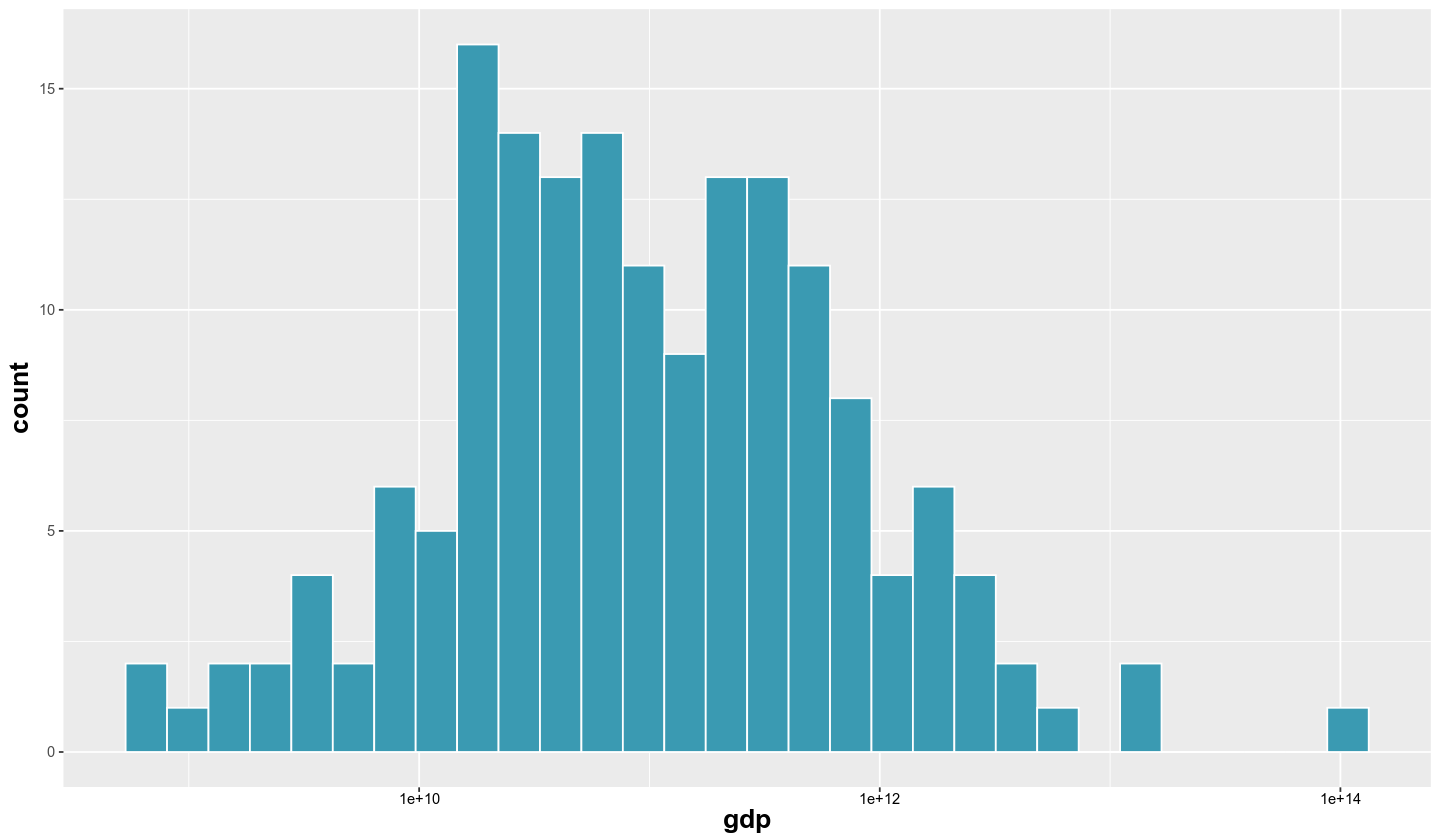

In [620]:
ggplot(data=subset, aes(x = gdp) ) +
    geom_histogram(color = "white") +
    scale_x_log10()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 45 rows containing non-finite outside the scale range (`stat_bin()`).”


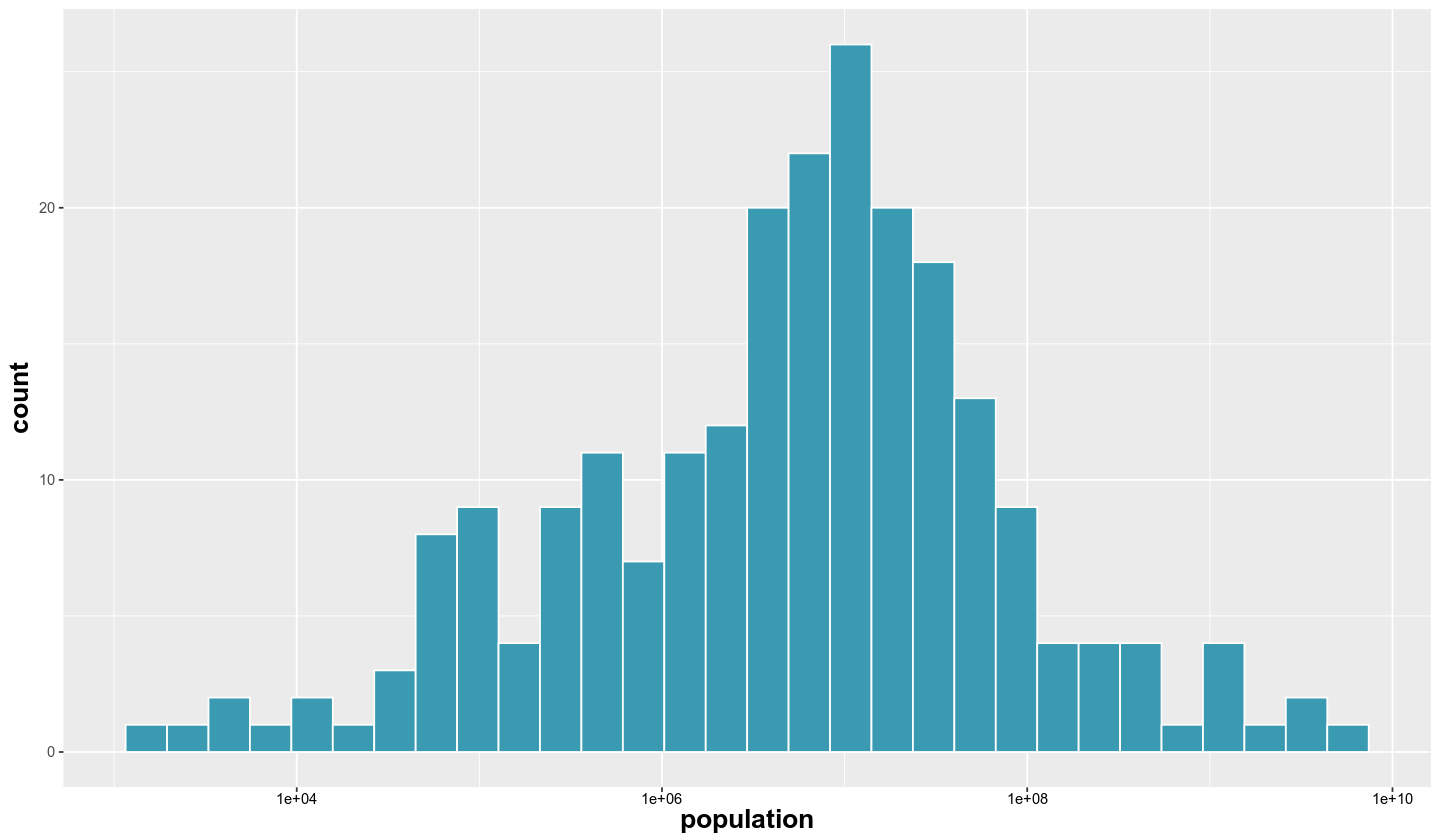

In [621]:

ggplot(subset, aes(x = population)) +
 geom_histogram() +
 scale_x_log10()

In [622]:
energy_dis <- subset %>%
        drop_na(renewables_cons_change_pct, fossil_cons_change_pct)

Warning message in transformation$transform(x):
“NaNs produced”


Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in transformation$transform(x):
“NaNs produced”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 17 rows containing non-finite outside the scale range (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 13 rows containing non-finite outside the scale range (`stat_bin()`).”


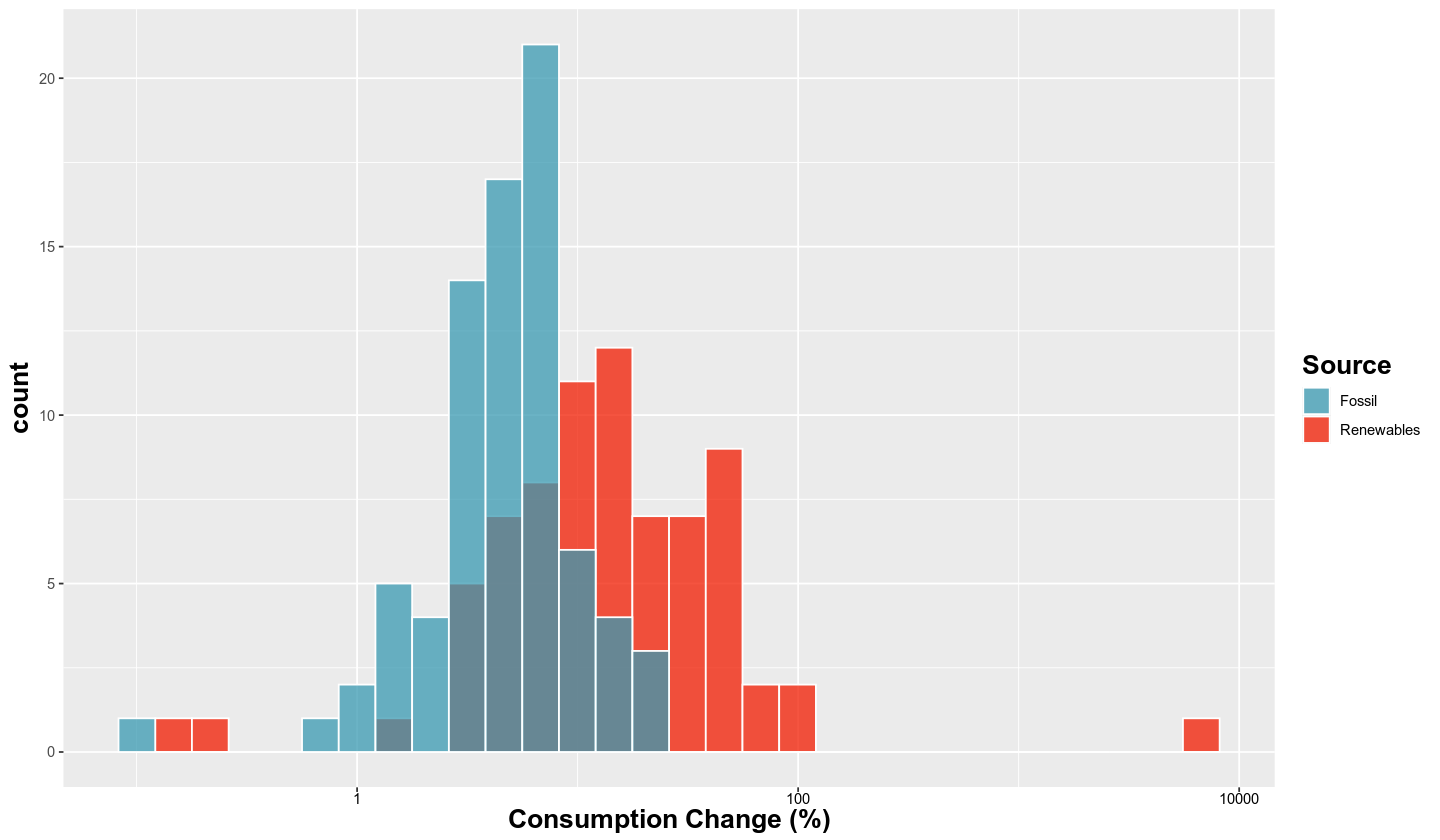

In [623]:
ggplot(energy_dis) +
  geom_histogram(aes(x = renewables_cons_change_pct, fill = "Renewables"), 
                 alpha = 0.75, position = "identity") +
  geom_histogram(aes(x = fossil_cons_change_pct, fill = "Fossil"), 
                 alpha = 0.75, position = "identity") +
  scale_fill_manual(values = dual_pal) +
  scale_x_log10() + 
  labs(x = "Consumption Change (%)", fill = "Source") 

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 211408 rows containing non-finite outside the scale range
(`stat_bin()`).”


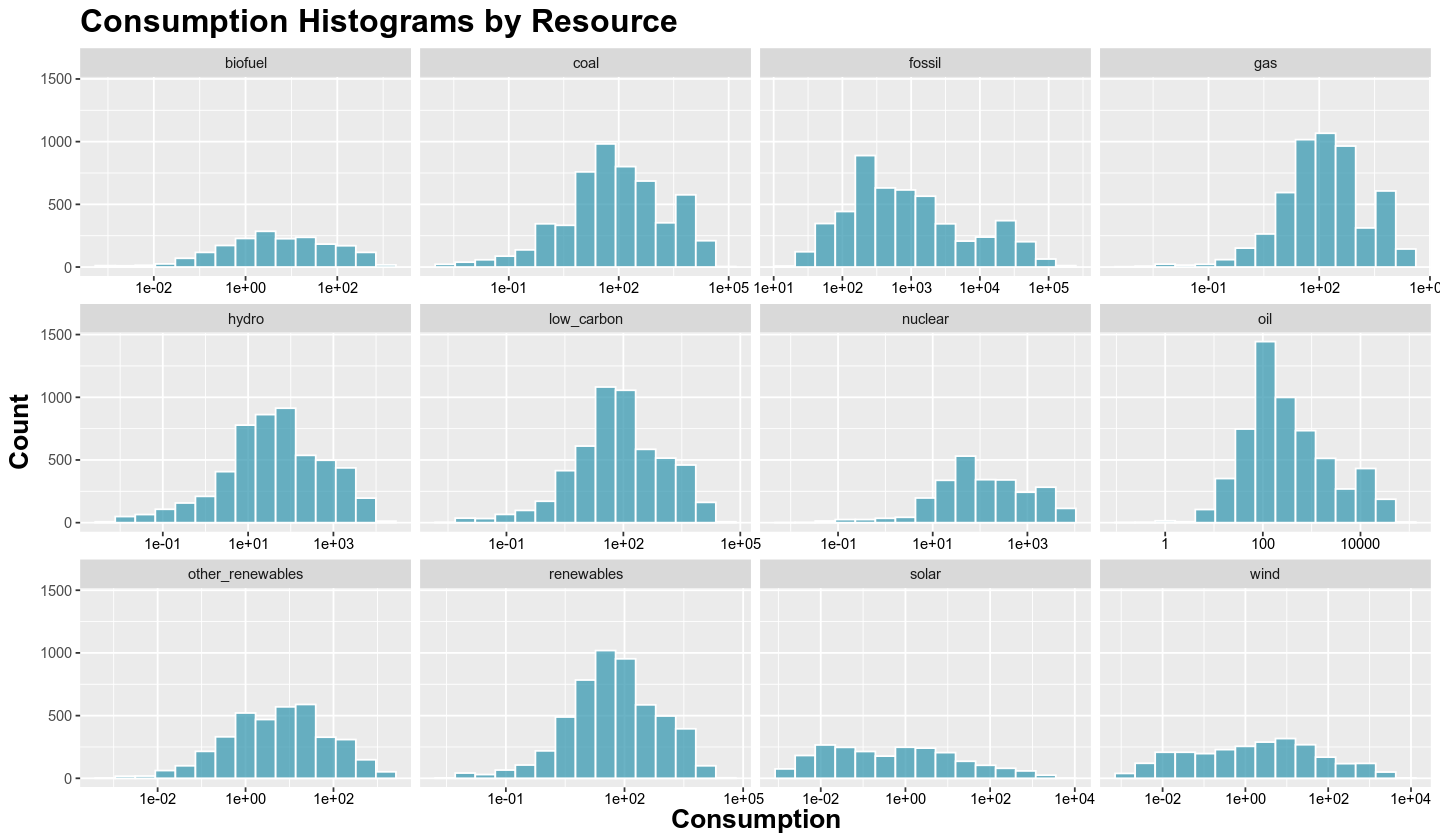

In [624]:
ggplot(df_long, aes(x = consumption)) +
  geom_histogram(fill = my_palette[1], color = "white", alpha = 0.75, bins=15) +
  facet_wrap(~ resource, scales = "free_x") + 
  scale_x_log10() +
  labs(x = "Consumption", y = "Count", title = "Consumption Histograms by Resource")
  

### Subsets

In [625]:
income_groups = c("High-income countries", "Upper-middle-income countries", "middle-income countries", "Lower-middle-income countries", "Low-income countries")

In [626]:
income_df <- df_long %>%
    filter(country %in% income_groups)

In [627]:
df_long <- df_long %>%
    filter(!(country %in% income_groups))

In [628]:
continents = c("Asia", "Antarctica", "Africa", "Europe", "North America", "South America", "Oceania")

In [629]:
continent_df <- df_long %>%
    filter(country %in% continents)

In [630]:
df_long <- df_long %>%
    filter(!(country %in% continents))

## World

### Energy Usage

In [631]:
world_df <- df_long %>%
    filter(country == "World")

In [632]:
head(world_df)

country,year,iso_code,population,gdp,carbon_intensity_elec,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,country_energy_per_capita,energy_per_gdp,greenhouse_gas_emissions,net_elec_imports,net_elec_imports_share_demand,per_capita_electricity,primary_energy_consumption,resource,cons_change_pct,cons_change_twh,cons_per_capita,consumption,elec_per_capita,electricity,share_elec,share_energy,prod_change_pct,prod_change_twh,prod_per_capita,production,energy_per_capita,exc_biofuel_electricity,elec_per_capita_exc_biofuel,share_elec_exc_biofuel
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
World,1900,,1627883132,3.503708e+12,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,biofuel,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
World,1900,,1627883132,3.503708e+12,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,coal,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,3286.408,5349.888,NA,NA,NA,NA
World,1900,,1627883132,3.503708e+12,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,fossil,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
World,1900,,1627883132,3.503708e+12,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,gas,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,45.360,73.840,NA,NA,NA,NA
World,1900,,1627883132,3.503708e+12,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,hydro,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
World,1900,,1627883132,3.503708e+12,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,low_carbon,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [633]:
df_long <- df_long %>%
    filter(country != "World")

Warning message:
“Removed 1020 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1020 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1020 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1020 rows containing missing values or values outside the scale range
(`geom_line()`).”


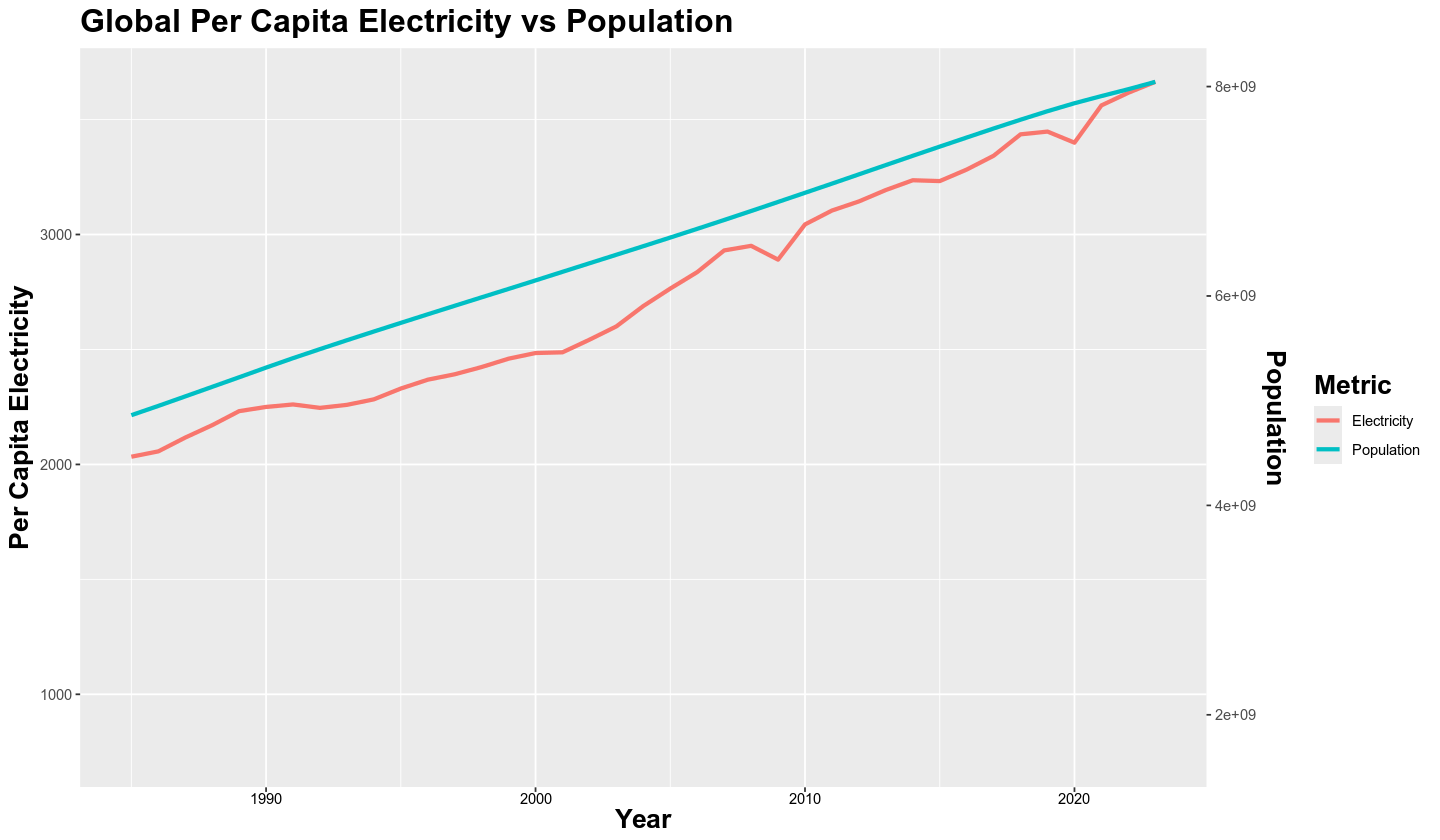

In [634]:
scale_factor <- max(world_df$per_capita_electricity, na.rm = TRUE)/
                max(world_df$population, na.rm = TRUE)

p <- ggplot(world_df, aes(x = year)) +
  geom_line(size = 1.2, aes(y = per_capita_electricity, color = "Electricity")) +
  geom_line(size = 1.2, aes(y = population * scale_factor, color = "Population")) +
  scale_x_continuous(limits = c(1985, NA)) +
  scale_y_continuous(
    name = "Per Capita Electricity",
    sec.axis = sec_axis(~ . / scale_factor, name = "Population")
  ) +
  labs(
    title = "Global Per Capita Electricity vs Population",
    x = "Year",
    color = "Metric"
  )

p
ggsave("figures/population_dual.png", plot = p, width = 10, height = 6, dpi = 300)

Warning message:
“Removed 1200 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1200 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1200 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1200 rows containing missing values or values outside the scale range
(`geom_line()`).”


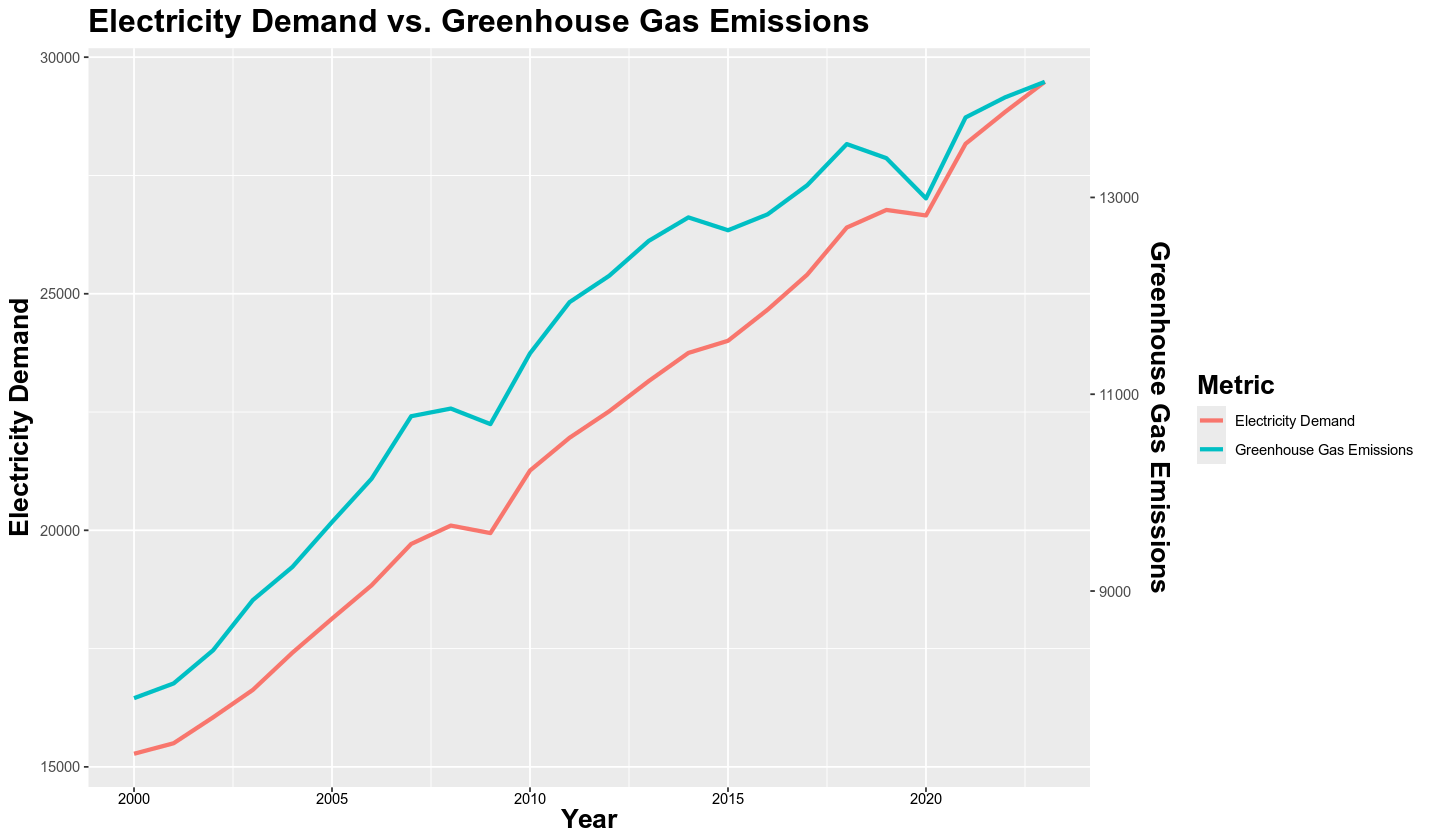

In [635]:
scale_factor <- max(world_df$electricity_demand, na.rm = TRUE) / 
                max(world_df$greenhouse_gas_emissions, na.rm = TRUE)

p <- ggplot(world_df, aes(x = year)) +
    geom_line(size = 1.2, aes(y = electricity_demand, color = "Electricity Demand")) +
    geom_line(size = 1.2, aes(y = greenhouse_gas_emissions * scale_factor, color = "Greenhouse Gas Emissions")) + 
    scale_x_continuous(limits = c(2000, NA)) +
    scale_y_continuous(
        name = "Electricity Demand",
        sec.axis = sec_axis(~ . / scale_factor, name = "Greenhouse Gas Emissions")
    ) +
    labs(
        title = "Electricity Demand vs. Greenhouse Gas Emissions",
        x = "Year",
        color = "Metric"
    )

p
ggsave("figures/green_house_dual_temporal.png", plot = p, width = 10, height = 6, dpi = 300)

In [636]:
yearly_resource_percentages <- world_df %>%
  group_by(year, resource) %>%
  filter(resource == "fossil" | resource == "renewables") %>%
  drop_na(consumption) %>%
  summarise(total_consumption = sum(consumption), .groups = 'drop') %>%
  group_by(year) %>%
  mutate(
    percentage_consumption = total_consumption / sum(total_consumption) * 100
  )


### Sources

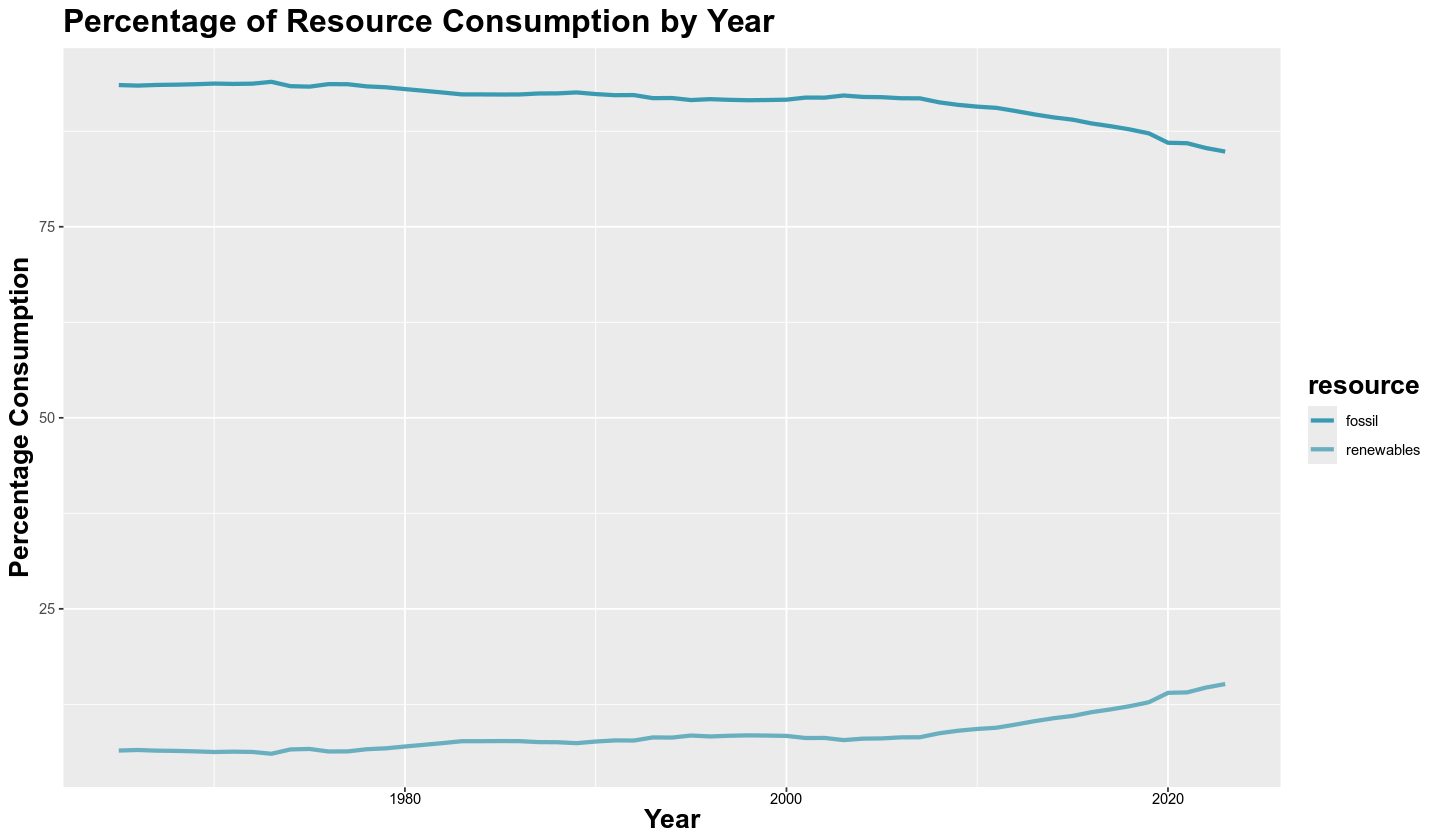

In [637]:
p <- ggplot(yearly_resource_percentages, aes(x = year, y = percentage_consumption, group = resource, color = resource)) +
  geom_line(size = 1.2) +
  scale_color_manual(values = my_palette) +
  labs(
    title = "Percentage of Resource Consumption by Year",
    x = "Year",
    y = "Percentage Consumption"
  )
  
p
ggsave("figures/resource_split_temporal.png", plot = p, width = 10, height = 6, dpi = 300)

In [638]:
total_resources <- world_df  %>%
  filter(year == 2023, !resource %in% c("fossil", "renewables")) %>%
  drop_na(consumption) %>%
  group_by(resource) %>%
  summarize(total = sum(consumption), .groups = "drop")

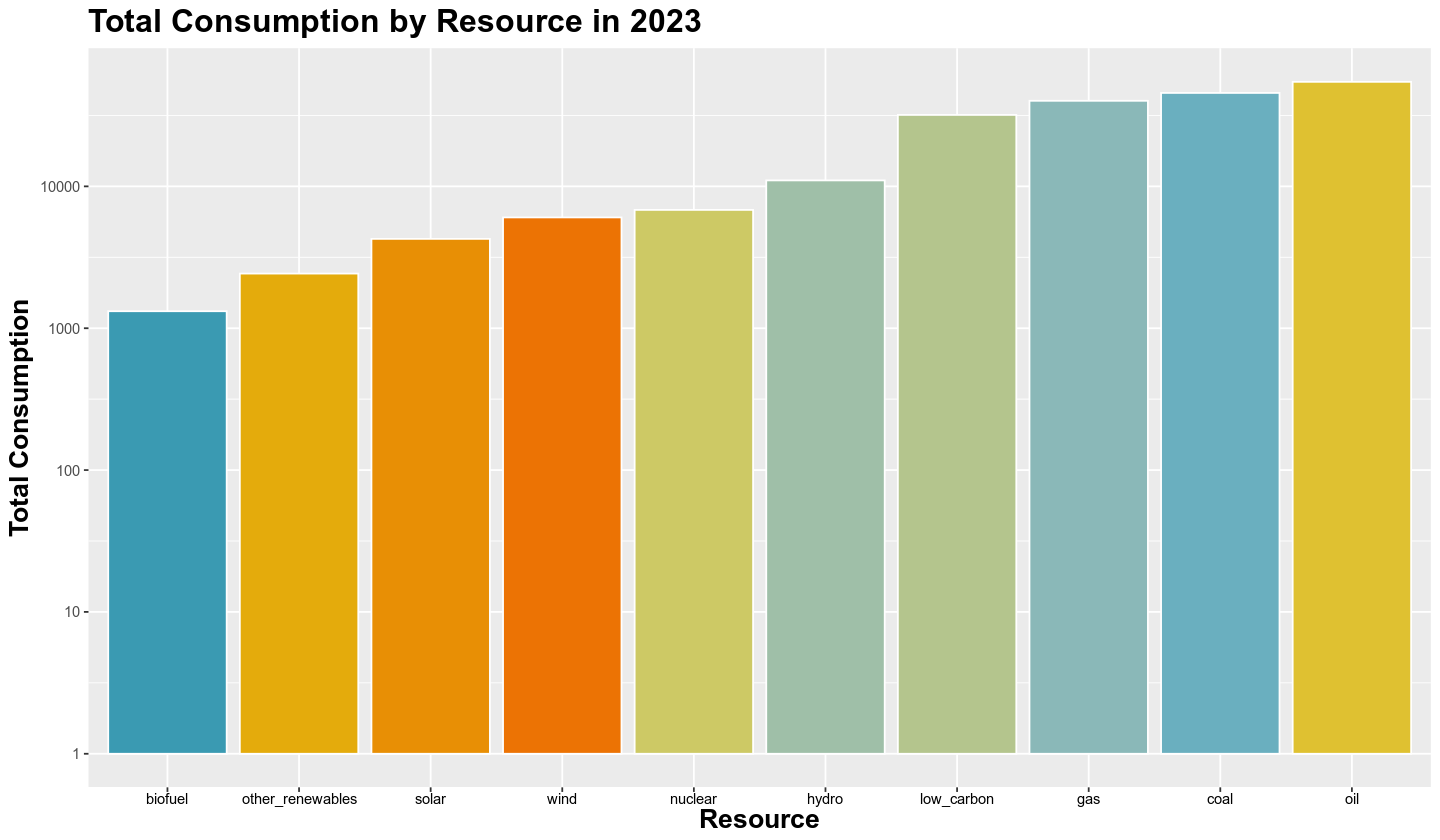

In [639]:

p <- ggplot(total_resources, aes(x = fct_reorder(resource, total), y = total, fill=resource)) +
  geom_col(show.legend = FALSE) +
  scale_fill_manual(values = my_palette) +
  scale_y_log10() + 
  labs(x = "Resource", y = "Total Consumption", title = "Total Consumption by Resource in 2023")

p
ggsave("figures/total_consumption_by_resource_2023.png", plot = p, width = 10, height = 6, dpi = 300)

Percentage of Consumption from each resource over the years

renewable energy percentages

In [640]:
RENEWABLE <- c("wind", "solar", "hydro", "other_renewables")

In [641]:
renewables <- df_long %>% 
  filter(resource %in% RENEWABLE) %>% 
  group_by(year, resource) %>% 
  drop_na(electricity) %>%
  summarise(resource_electricity = sum(electricity), .groups = "drop") %>%
  group_by(year) %>% 
  mutate(
    total_renewable = sum(resource_electricity),
    percentage_of_total_renewables = resource_electricity / total_renewable
  )

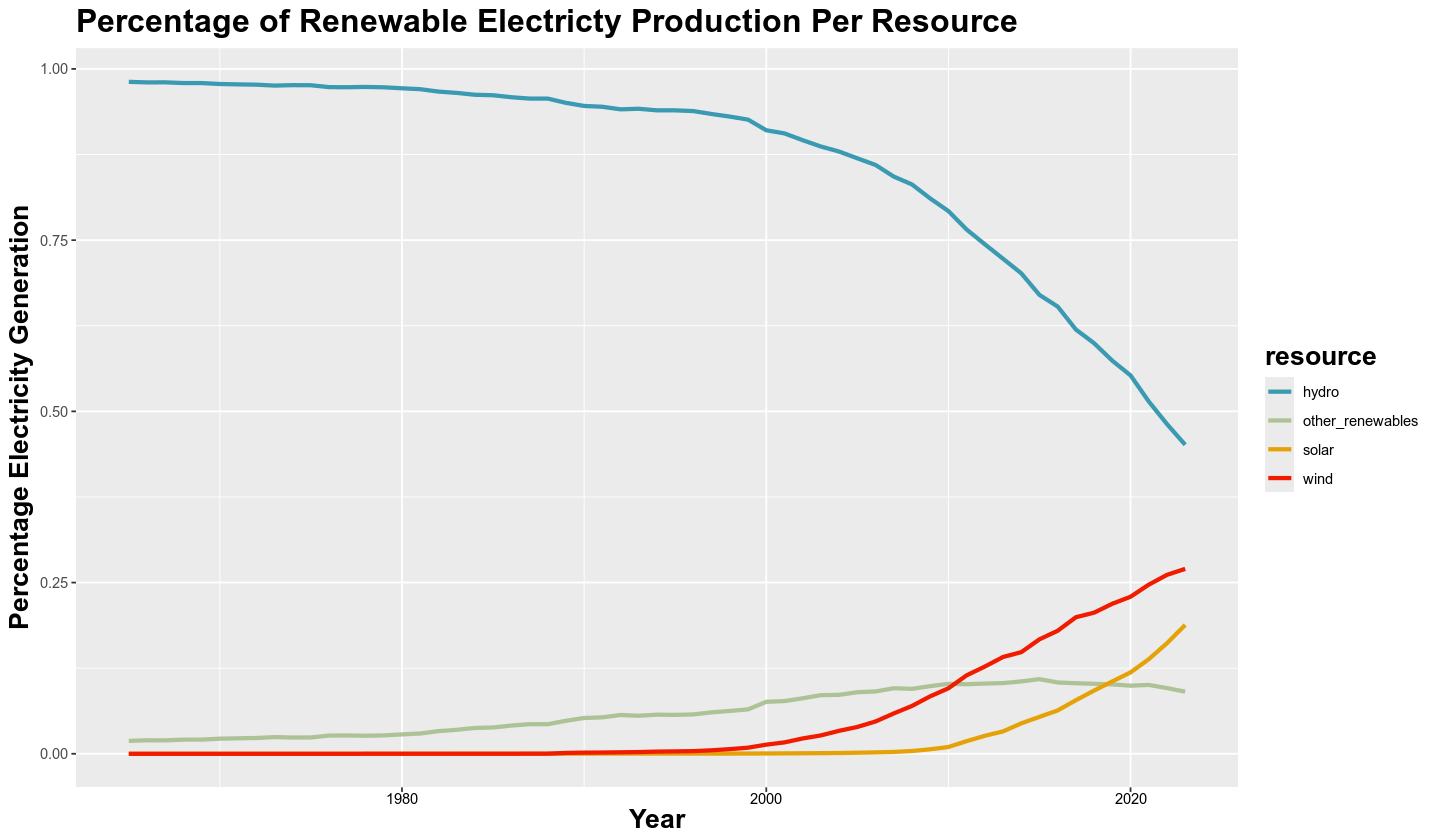

In [642]:
pal <- wes_palette("Zissou1", 4, type = "continuous")

p <- ggplot(renewables, aes(x = year, y = percentage_of_total_renewables, group = resource, color = resource)) +
  geom_line(size = 1.2) +
  scale_color_manual(values = pal) +
  labs(
    title = "Percentage of Renewable Electricty Production Per Resource",
    x = "Year",
    y = "Percentage Electricity Generation"
  )

p
ggsave("figures/global_renewable.png", plot = p, width = 10, height = 6, dpi = 300)

In [643]:
FOSSIL <- c("oil", "coal", "gas")

In [644]:
fossil <- df_long %>% 
  filter(resource %in% FOSSIL) %>% 
  group_by(year, resource) %>% 
  drop_na(electricity) %>%
  summarise(resource_electricity = sum(electricity), .groups = "drop") %>%
  group_by(year) %>% 
  mutate(
    total_renewable = sum(resource_electricity),
    percentage_of_total_renewables = resource_electricity / total_renewable
  )

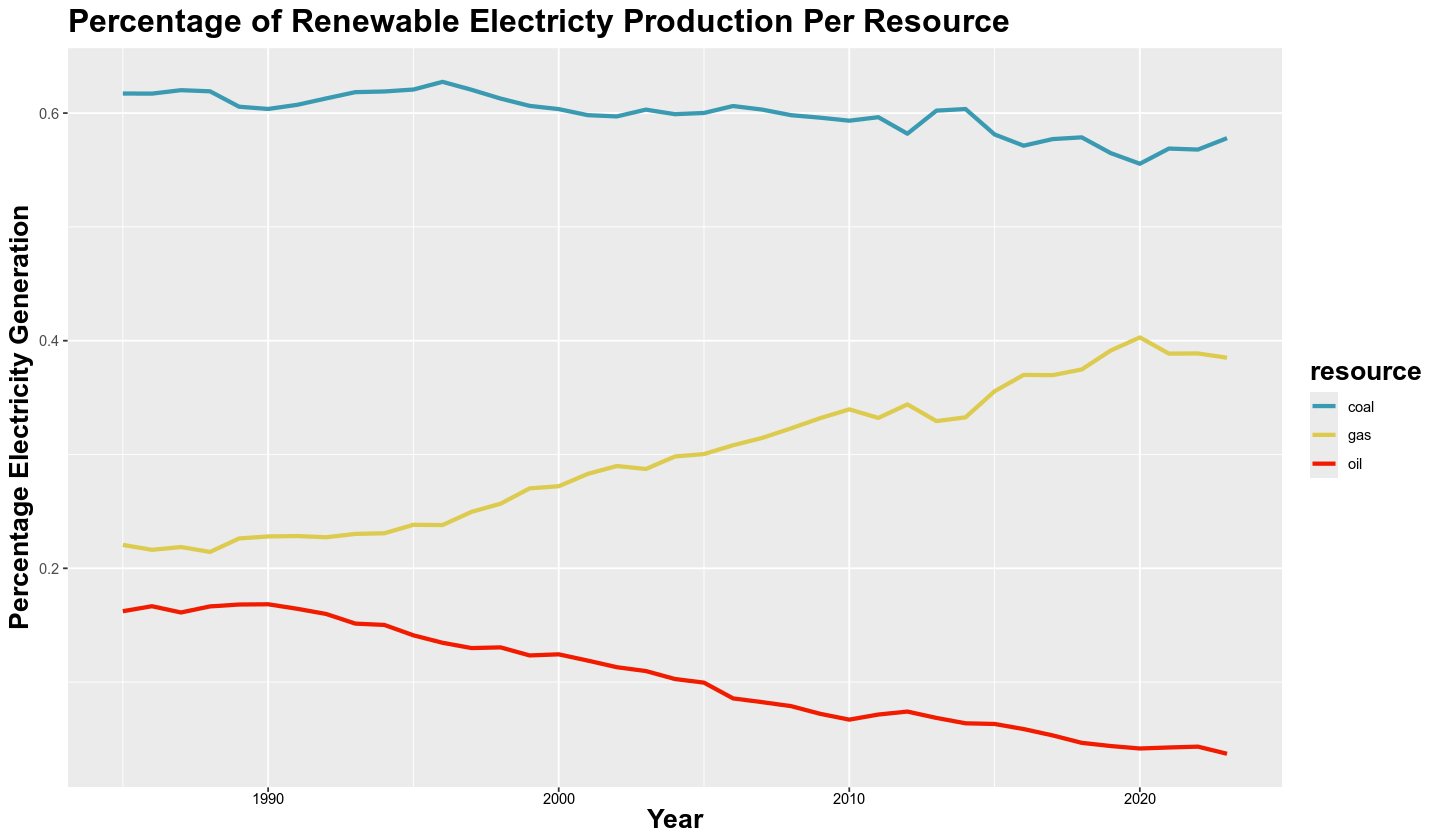

In [645]:
pal <- wes_palette("Zissou1", 3, type = "continuous")

p <- ggplot(fossil, aes(x = year, y = percentage_of_total_renewables, group = resource, color = resource)) +
  geom_line(size = 1.2) +
  scale_color_manual(values = pal) +
  labs(
    title = "Percentage of Renewable Electricty Production Per Resource",
    x = "Year",
    y = "Percentage Electricity Generation"
  )

p
ggsave("figures/global_fossil.png", plot = p, width = 10, height = 6, dpi = 300)

## Country

### Energy Usage

In [646]:
df_long <- rename(df_long, iso_a3 = iso_code)

In [647]:
world <- ne_countries(scale = "medium", returnclass = "sf")
world_data <- left_join(world, df_long, by = "iso_a3") %>%
    filter(year == 2023)

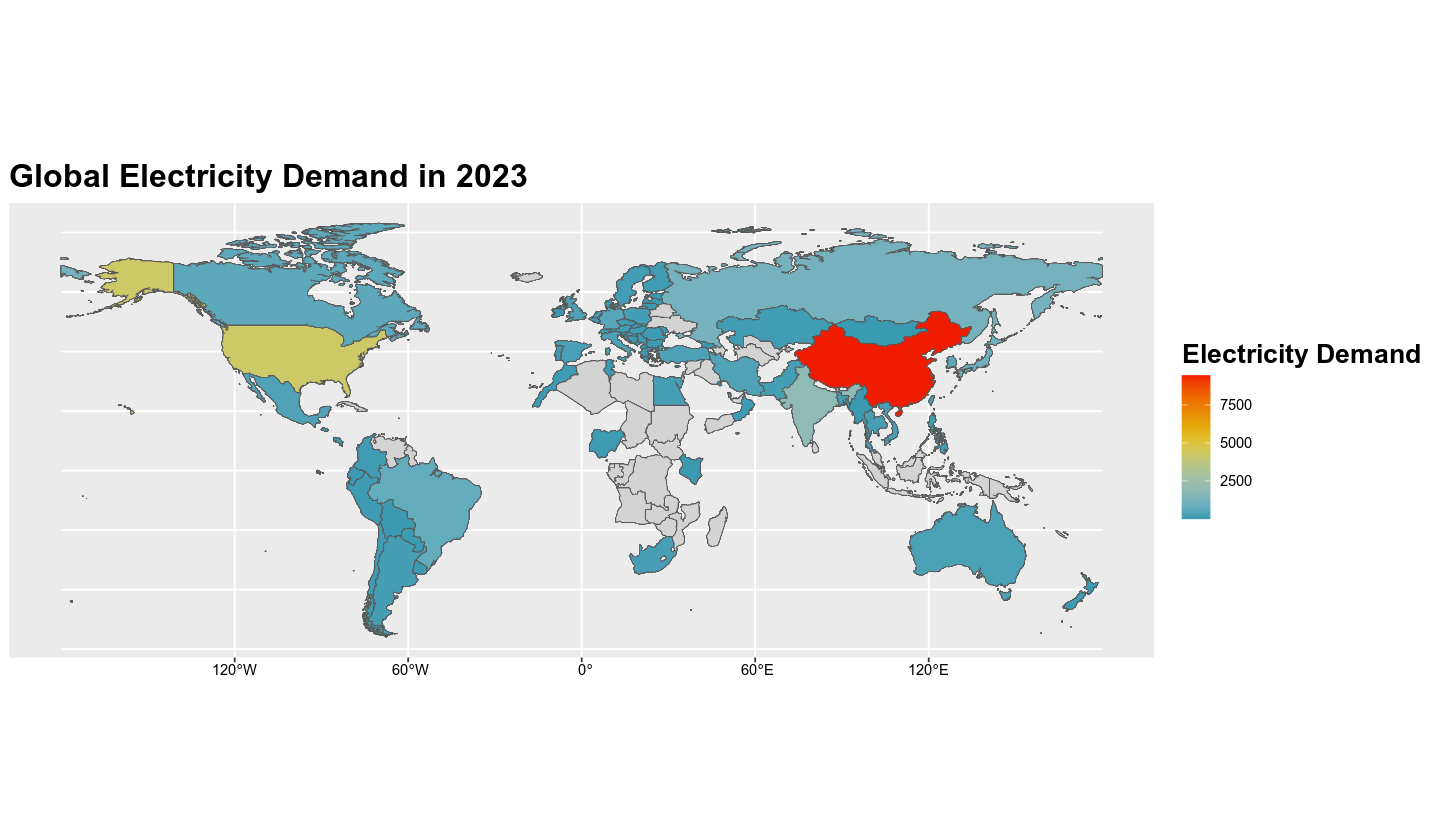

In [648]:

p <- ggplot(world_data) +
  geom_sf(aes(fill = electricity_demand)) +
  scale_fill_gradientn(colors = my_palette, na.value = "lightgrey") +
  labs(
    title = "Global Electricity Demand in 2023",
    fill = "Electricity Demand"
  )


p
ggsave("figures/world_energy.png", plot = p, width = 10, height = 6, dpi = 300)

### Sources

Entropy

In [649]:
diversity <- df_long %>%
  group_by(year, country) %>%
  filter(!is.na(consumption) & consumption > 0) %>%
  mutate(prop = consumption / sum(consumption)) %>%
  summarise(entropy = entropy::entropy(prop, unit = "log10"), .groups = "drop")

diversity_with_gdp <- diversity %>%
  left_join(df %>% select(year, country, gdp), by = c("year", "country"))

top_countries <- diversity_with_gdp %>%
  group_by(country) %>%
  summarise(avg_gdp = mean(gdp, na.rm = TRUE)) %>%
  arrange(desc(avg_gdp)) %>%
  filter(!(country %in%  c("World", "USSR"))) %>%
  slice_head(n = 12) %>%
  pull(country)

entropy <- diversity_with_gdp %>%
  filter(country %in% top_countries)


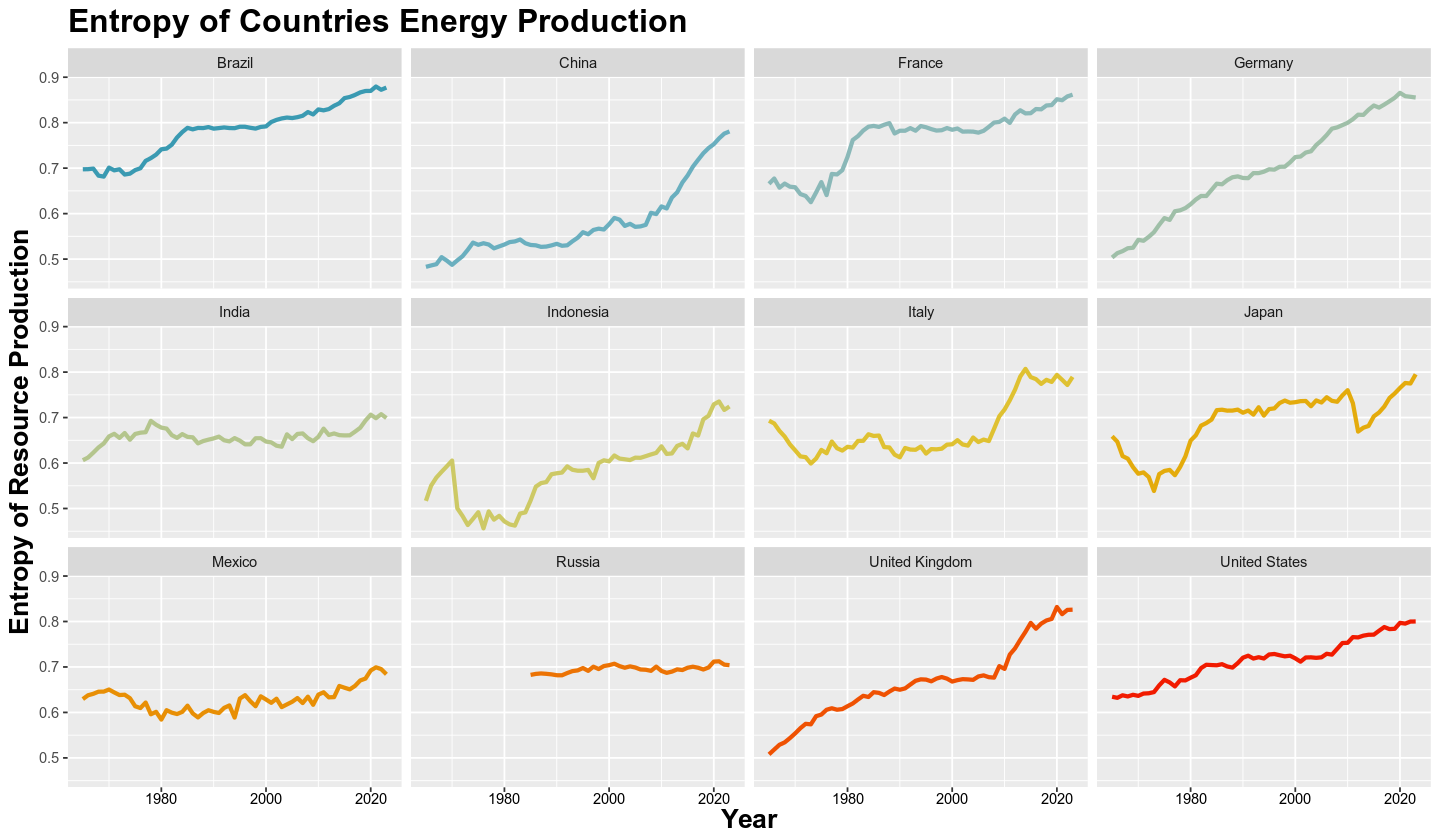

In [650]:
p <- ggplot(entropy, aes(x = year, y= entropy, groups = country, color=country)) +
    geom_line(size=1.2, show.legend=FALSE) +
    facet_wrap(~country) + 
    scale_color_manual(values = my_palette) + 
    labs(title="Entropy of Countries Energy Production", x="Year", y="Entropy of Resource Production")


p 
ggsave("figures/entropy.png", plot = p, width = 10, height = 6, dpi = 300)

fossil fuel ratios over time

In [651]:
df$fossil_ratio <- df$fossil_fuel_consumption / df$renewables_consumption

In [661]:
top_energy <- df %>%
  group_by(country) %>%
  summarise(avg_energy_demand = mean(electricity_demand, na.rm = TRUE)) %>%
  arrange(desc(avg_energy_demand)) %>%
  filter(!(country %in% c("World", "USSR")) & !(country %in% income_groups) & !(country %in% continents)) %>%
  slice_head(n = 12) %>%
  pull(country)

In [662]:
top_energy

[1] "China"               "United States"       "European Union (27)"
 [4] "India"               "Japan"               "Russia"             
 [7] "Canada"              "Germany"             "Brazil"             
[10] "South Korea"         "France"              "United Kingdom"

In [663]:
fossil <- df %>% 
    filter(country %in% top_energy)

Warning message:
“Removed 936 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 936 rows containing missing values or values outside the scale range
(`geom_line()`).”


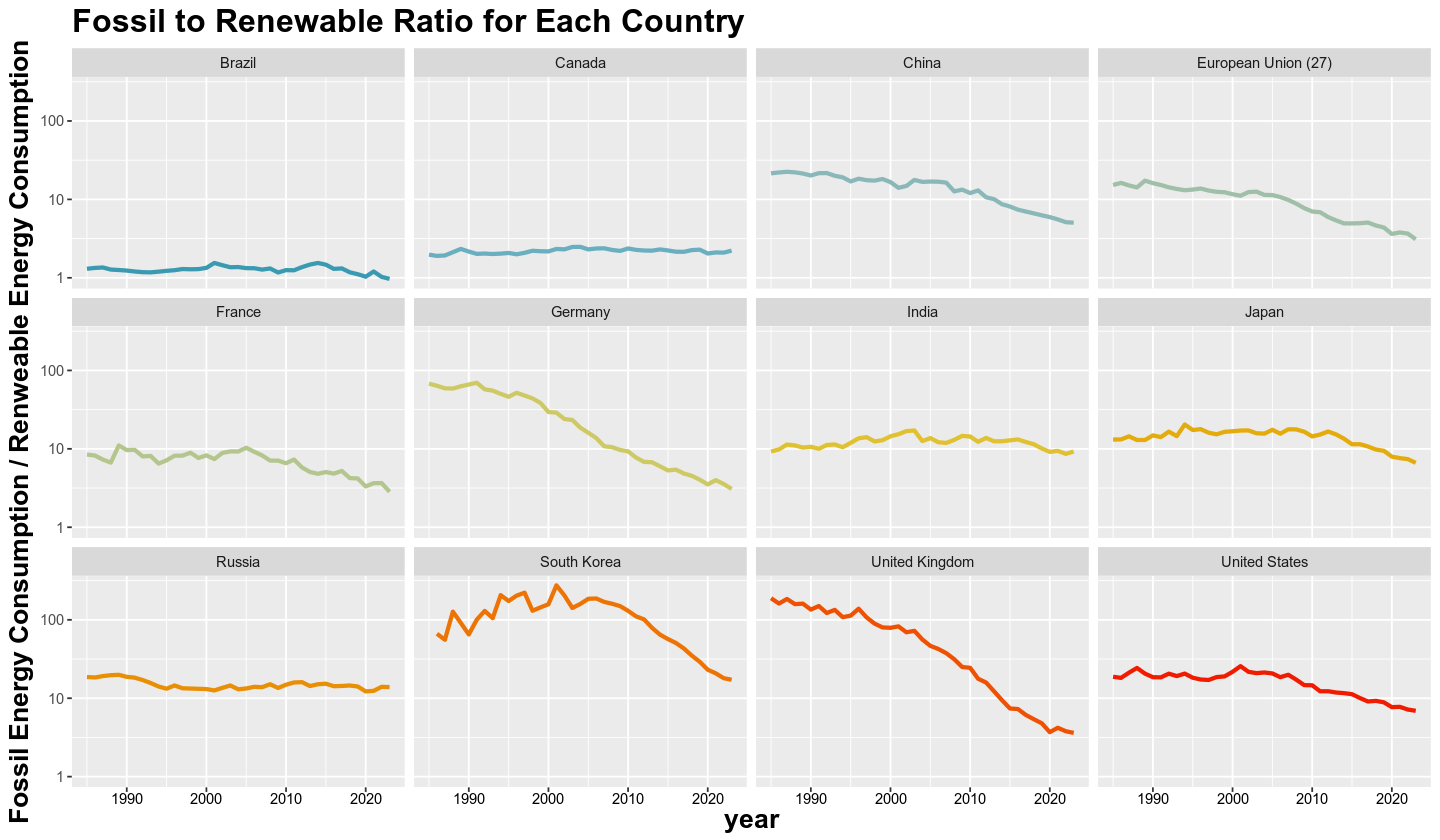

In [665]:

p <- ggplot(fossil, aes(x=year, y=fossil_ratio, color=country)) +
    geom_line(size=1.2, show.legend = FALSE) +
    scale_color_manual(values = my_palette) +
    facet_wrap(~country) +
    labs(title = "Fossil to Renewable Ratio for Each Country", y="Fossil Energy Consumption / Renweable Energy Consumption") +
    scale_y_log10() + 
    scale_x_continuous(limits = c(1985, NA))

p 
ggsave("figures/fossil_ratio.png", plot = p, width = 10, height = 6, dpi = 300)

Change PCT

In [657]:
change_pct <- df_long %>%  
  group_by(year, resource) %>%
  drop_na(cons_change_pct) %>%
  summarise(mean_pct_change = mean(cons_change_pct), .groups = 'drop')

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


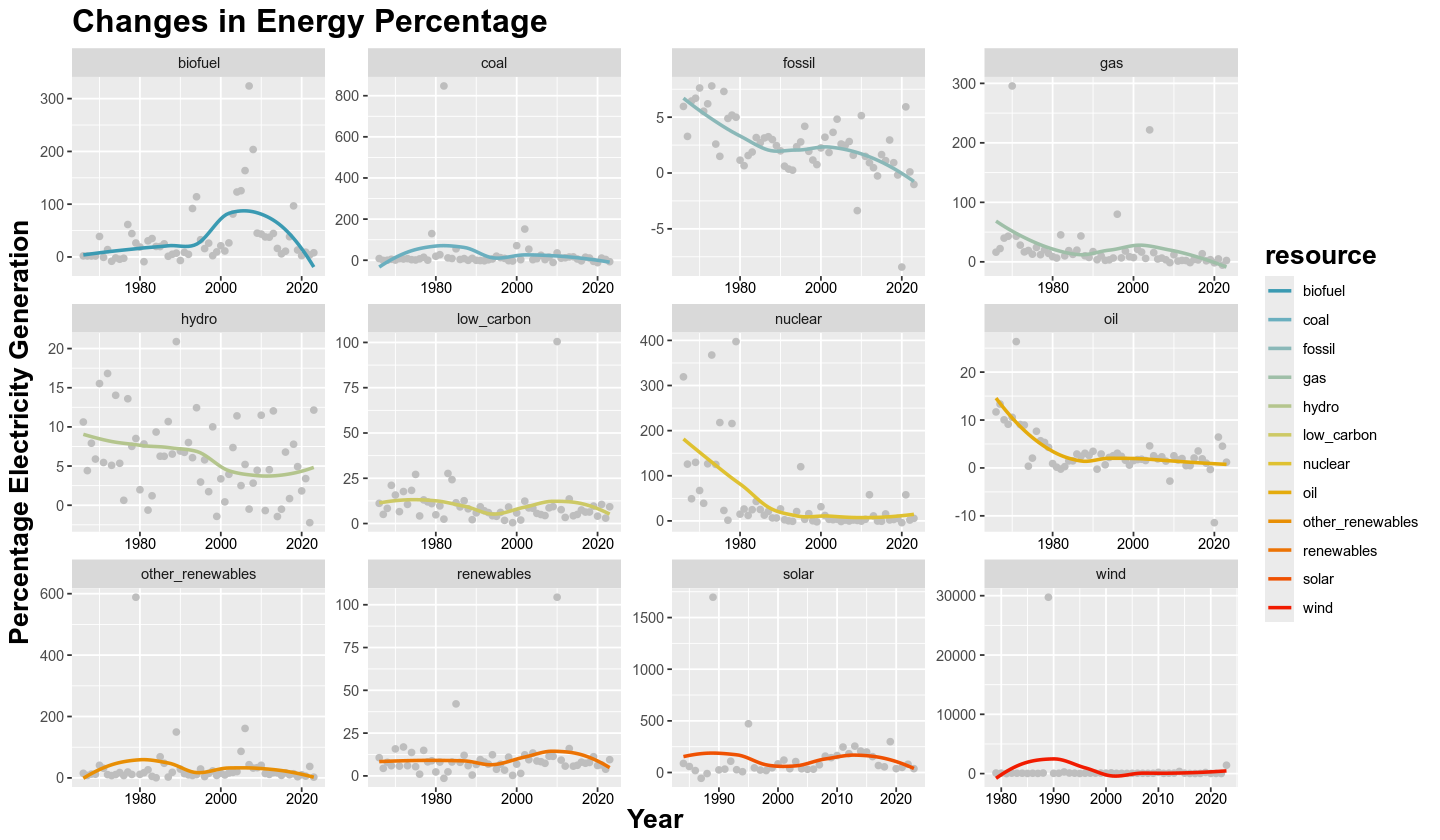

In [658]:


ggplot(change_pct, aes(x=year, y=mean_pct_change, groups = resource, color= resource)) +
  # geom_line(size = 1.2, show.legend = FALSE) +
  geom_point(color="grey") + 
  geom_smooth(se = FALSE) + 
  facet_wrap(~resource, scale="free") + 
  scale_color_manual(values = my_palette) +
  labs(
    title = "Changes in Energy Percentage",
    x = "Year",
    y = "Percentage Electricity Generation"
  )
    

### Relational Plots